## 1.importing libraries


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp


## 2.key points using mp


In [2]:
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#color conversion bgr to rgb
    image.flags.writeable = False
    results =model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return (image,results)

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:  
    while cap.isOpened():
        #read feed
        ret,frame=cap.read()
        #make detection
        image, results= mediapipe_detection(frame,holistic)
        print(results)
        
        draw_styled_landmarks(image,results)
        #show to screen
        cv2.imshow('opencv feed', image)



        if cv2.waitKey(10)& 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
frame

array([[[ 40,  21,   0],
        [ 42,  14,   0],
        [ 43,   7,   6],
        ...,
        [155, 128, 125],
        [152, 128, 116],
        [149, 124, 112]],

       [[ 37,  18,   0],
        [ 40,  14,   0],
        [ 44,  13,   7],
        ...,
        [154, 128, 125],
        [155, 129, 120],
        [151, 126, 116]],

       [[ 35,  14,   0],
        [ 39,  15,   1],
        [ 43,  15,   6],
        ...,
        [150, 128, 121],
        [154, 131, 121],
        [153, 130, 120]],

       ...,

       [[ 65,  60,  72],
        [ 61,  57,  67],
        [ 60,  56,  64],
        ...,
        [ 62,  62,  65],
        [ 50,  52,  56],
        [ 43,  45,  49]],

       [[ 63,  58,  70],
        [ 62,  58,  69],
        [ 61,  58,  68],
        ...,
        [ 67,  69,  68],
        [ 52,  56,  56],
        [ 41,  46,  45]],

       [[ 62,  57,  68],
        [ 63,  59,  70],
        [ 64,  62,  71],
        ...,
        [ 67,  76,  72],
        [ 48,  60,  56],
        [ 32,  45,  41]]

In [8]:
draw_landmarks(frame,results)

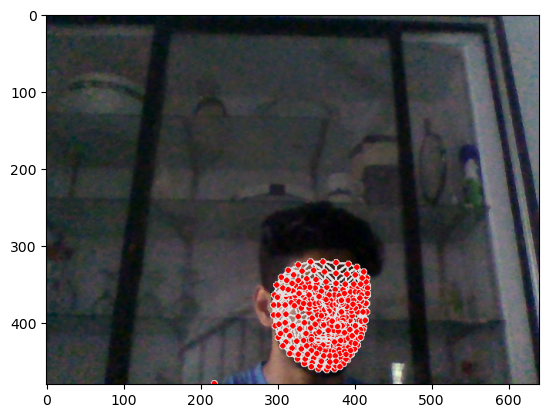

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint values

In [10]:
len(results.face_landmarks.landmark)

468

In [11]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [12]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh= np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh= np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.57970971,  0.83103144, -0.98690784, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.57728273,  0.58262795, -0.70719099, ...,  0.38625205,
        0.59915596, -0.02349161])

In [15]:
len(result_test)

1662

## 4.setup folders

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['help', 'please','see you later'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [72]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


## 5.collection for testing and training

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
#     cap.release()
#     cv2.destroyAllWindows()

## 6.Preprocess Data

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'help': 0, 'please': 1, 'see you later': 2}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape

(90, 30, 1662)

In [23]:
X = np.array(sequences,dtype=object)

In [68]:
X.shape

(90, 30, 1662)

In [25]:
y = to_categorical(labels).astype(int)

In [67]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [27]:
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09)

In [88]:
y_test.shape

(9, 3)

In [37]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

## 7.LSTM

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [30]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [76]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [97]:
res = [.7,0.3,0.1]

In [98]:
actions[np.argmax(res)]

'help'

In [99]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [104]:
model.fit(X_train,y_train,epochs=200,callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 1s 187ms/step - loss: 1.1262 - categorical_accuracy: 0.6420
Epoch 2/200
3/3 [==============================] - 1s 196ms/step - loss: 0.8320 - categorical_accuracy: 0.6790
Epoch 3/200
3/3 [==============================] - 1s 198ms/step - loss: 0.6800 - categorical_accuracy: 0.5926
Epoch 4/200
3/3 [==============================] - 1s 178ms/step - loss: 0.6418 - categorical_accuracy: 0.7284
Epoch 5/200
3/3 [==============================] - 1s 181ms/step - loss: 0.4377 - categorical_accuracy: 0.7778
Epoch 6/200
3/3 [==============================] - 1s 183ms/step - loss: 0.3861 - categorical_accuracy: 0.8889
Epoch 7/200
3/3 [==============================] - 1s 180ms/step - loss: 0.4001 - categorical_accuracy: 0.8148
Epoch 8/200
3/3 [==============================] - 1s 183ms/step - loss: 0.4421 - categorical_accuracy: 0.7901
Epoch 9/200
3/3 [==============================] - 1s 183ms/step - loss: 0.3483 - categorical_accuracy: 0.8025
E

3/3 [==============================] - 1s 183ms/step - loss: 0.3565 - categorical_accuracy: 0.7778
Epoch 75/200
3/3 [==============================] - 1s 180ms/step - loss: 0.3904 - categorical_accuracy: 0.8272
Epoch 76/200
3/3 [==============================] - 1s 188ms/step - loss: 0.2690 - categorical_accuracy: 0.9012
Epoch 77/200
3/3 [==============================] - 1s 180ms/step - loss: 0.2035 - categorical_accuracy: 0.9383
Epoch 78/200
3/3 [==============================] - 1s 183ms/step - loss: 0.2163 - categorical_accuracy: 0.9259
Epoch 79/200
3/3 [==============================] - 1s 178ms/step - loss: 0.2361 - categorical_accuracy: 0.9012
Epoch 80/200
3/3 [==============================] - 1s 183ms/step - loss: 0.2486 - categorical_accuracy: 0.8765
Epoch 81/200
3/3 [==============================] - 1s 183ms/step - loss: 0.2402 - categorical_accuracy: 0.9506
Epoch 82/200
3/3 [==============================] - 1s 180ms/step - loss: 0.3370 - categorical_accuracy: 0.8148
Epoch

3/3 [==============================] - 1s 197ms/step - loss: 0.1124 - categorical_accuracy: 0.9877
Epoch 147/200
3/3 [==============================] - 1s 242ms/step - loss: 0.1200 - categorical_accuracy: 0.9753
Epoch 148/200
3/3 [==============================] - 1s 216ms/step - loss: 0.1147 - categorical_accuracy: 0.9877
Epoch 149/200
3/3 [==============================] - 1s 216ms/step - loss: 0.1224 - categorical_accuracy: 0.9753
Epoch 150/200
3/3 [==============================] - 1s 188ms/step - loss: 0.1084 - categorical_accuracy: 0.9630
Epoch 151/200
3/3 [==============================] - 1s 224ms/step - loss: 0.1072 - categorical_accuracy: 0.9753
Epoch 152/200
3/3 [==============================] - 1s 229ms/step - loss: 0.1221 - categorical_accuracy: 0.9753
Epoch 153/200
3/3 [==============================] - 1s 207ms/step - loss: 0.1032 - categorical_accuracy: 0.9877
Epoch 154/200
3/3 [==============================] - 1s 200ms/step - loss: 0.1276 - categorical_accuracy: 0.97

In [ ]:
# tensorboard prompt run python -m tensorboard.main --logdir=C:\Users\rosha\sign_language\Logs\train

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

## 8.Prediction

In [106]:
res = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [107]:
actions[np.argmax(res[4])]

'help'

In [108]:
actions[np.argmax(y_test[4])]

'help'

## 9. Save Weights


In [109]:
model.save('action.h5')

In [110]:
model.load_weights('action.h5')

## 10. accuracy

In [111]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [112]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 92ms/step


In [113]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [114]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 2]],

       [[4, 0],
        [0, 5]],

       [[7, 0],
        [0, 2]]], dtype=int64)

In [115]:
accuracy_score(ytrue, yhat)

1.0

## 11. test in real time

In [116]:
from scipy import stats

In [118]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.65

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
         #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)]>threshold:
                    if len(sentence)>0:
                        if actions [np.argmax(res)] !=sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) >5:
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)    
       
        
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
             
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 45ms/step
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
see you later
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
see you later
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
see you later
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
see you later
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step


KeyboardInterrupt: 

In [ ]:
res[np.argmax(res)]

In [119]:
    cap.release()
    cv2.destroyAllWindows()